In [24]:
# Plot differences in performace for different cache ways compared to 2-way
# How do we show 1024?

# Maybe start with 256-2 as "base", then relative number for each bar.
# So 256-2, 256-4, 512-2, 512-4, 1024-2, 1024-4

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
#%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import numpy as np
from Color import *
from operator import truediv, sub
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

# Matplotlib font configuration
from MatplotlibFonts import *

# Helpers
from BrokenPlot import *

# Change the font size
rcParams.update({"font.size": 13})

In [27]:
%reload_ext autoreload
from BenchmarkConfiguration import *
from Color import *

In [28]:
RESULT_DIR='../benchmarks/logs'

In [29]:
Benchmarks = [
    'coremark',
    'picojpeg',
    'aes',
    'crc',
    'dijkstra',
    'sha'
]

BaseConfigurations = [
    'nacho_naive',
    'nacho_pw',
    'nacho_stcont',
    'nacho_pw_st',
    'nacho_pw_stcont',
    'nacho_clank',
    'prowl',
    'clank',
    'plain_c'
]

CacheConfigurations = [
    '256-2',
    '256-4',
    '512-2',
    '512-4',
    '1024-2',
    '1024-4'
]

In [30]:
# Load all the results into a dictionary

def loadResult(Results, benchmark, config, cache, postfix='-0-0-Os-final'):
    if cache == '0-0':
        filename = RESULT_DIR + '/' + benchmark + '-uninstrumented-run-' + config + postfix
    else:
        filename = RESULT_DIR + '/' + benchmark + '-uninstrumented-run-' + config + '-' + cache + postfix
    
    #print(filename)
    if config not in Results[benchmark]:
        Results[benchmark][config] = {}
    
    # Add the results
    Results[benchmark][config][cache] = dict(pd.read_csv(filename, delimiter=":", header = None).values)

Results = {}

for benchmark in Benchmarks:
    Results[benchmark] = {}

    # Load Nacho results
    nacho_caches = [
        '256-2',
        '256-4',
        '512-2',
        '512-4',
        '1024-2',
        '1024-4'
    ]
    for cache in nacho_caches:
        loadResult(Results, benchmark, 'nacho_pw_stcont', cache)
        
    loadResult(Results, benchmark, 'plain_c', '0-0', '-Os-final')


#Results

In [31]:
# Benchmark plots with execution time
# Plot each benchmark, each config, two cache configs (256, 512)

PlotBenchmarks = Benchmarks
PlotConfigurations = BaseConfigurations

EntryToPlot='cycles'

def getPlotData(PlotData, benchmark, config, cache):
    key = cache
    if key not in PlotData[benchmark]:
        PlotData[benchmark][key] = {}
        
    PlotData[benchmark][cache] = Results[benchmark][config][cache][EntryToPlot]

PlotData = {}
for benchmark in PlotBenchmarks:
    PlotData[benchmark] = {}
    for cache in CacheConfigurations:
        getPlotData(PlotData, benchmark, 'nacho_pw_stcont', cache)
        
    # plain0c
    getPlotData(PlotData, benchmark, 'plain_c', '0-0')
    
    
#PlotData
PlotDataDF = pd.DataFrame.from_dict(PlotData)
PlotDataDF

,coremark,picojpeg,aes,crc,dijkstra,sha
256-2,5513292.0,79815404.0,14186322.0,42838.0,128751678,39070714.0
256-4,5424622.0,42018266.0,14073984.0,44248.0,127331702,40777584.0
512-2,3468560.0,67901194.0,12875942.0,40718.0,122560684,31747368.0
512-4,3412930.0,34693038.0,12688848.0,39054.0,121463220,33878536.0
1024-2,3206846.0,32413258.0,12195764.0,39492.0,100342732,27087172.0
1024-4,3149032.0,32073490.0,11841324.0,37242.0,94834208,27107054.0
0-0,3091890.0,27826140.0,12234222.0,34094.0,65283080,23364940.0


In [32]:
NormPlotDataDF = PlotDataDF / PlotDataDF.T['0-0']
NormPlotDataDF = NormPlotDataDF.drop('0-0')
NormPlotDataDF = NormPlotDataDF.T
NormPlotDataDF = NormPlotDataDF.rename(BenchmarkNameMap)
NormPlotDataDF

,256-2,256-4,512-2,512-4,1024-2,1024-4
CoreMark,1.783146,1.754468,1.121825,1.103833,1.037180,1.018481
picojpeg,2.868361,1.510029,2.440195,1.246779,1.164849,1.152639
Tiny AES,1.159561,1.150378,1.052453,1.037160,0.996857,0.967885
CRC,1.256467,1.297824,1.194286,1.145480,1.158327,1.092333
Dijkstra,1.972206,1.950455,1.877373,1.860562,1.537040,1.452661
SHA,1.672194,1.745247,1.358761,1.449973,1.159308,1.160159


In [33]:
%reload_ext autoreload
from BenchmarkConfiguration import *
from Color import *

# Colors
ColorMap = {
    '256-2': Color['darkblue'],
    '256-4': Color['darkblue'],
    '512-2': Color['blue'],
    '512-4': Color['blue'],
    '1024-2': Color['lightblue'],
    '1024-4': Color['lightblue'],
}

way_2_hatch = ''
way_4_hatch = '\\\\\\'
HatchMap = {
    '256-2': way_2_hatch,
    '256-4': way_4_hatch,
    '512-2': way_2_hatch,
    '512-4': way_4_hatch,
    '1024-2': way_2_hatch,
    '1024-4': way_4_hatch,
}

color_list = []
hatch_list = []
for cfg in NormPlotDataDF:  
    color_list += [ColorMap[cfg]]
    hatch_list += [HatchMap[cfg]]
    
print('Colors:', color_list)
print('Hatches:', hatch_list)

Colors: ['#464B75', '#464B75', '#0077BB', '#0077BB', '#00A6D6', '#00A6D6']
Hatches: ['', '\\\\\\', '', '\\\\\\', '', '\\\\\\']


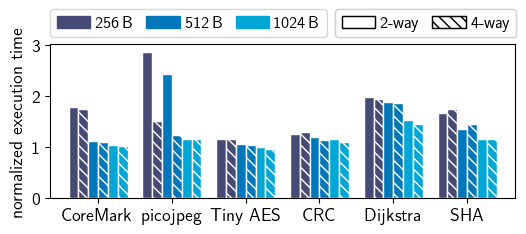

In [34]:

# Execution time plot
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)

NormPlotDataDF.plot(kind='bar', ax=ax, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1)

applyHatches(Benchmarks, hatch_list, ax)

#
# Add custom legend (manual way)
#
 
# Config legend
configs = ['256\,B', '512\,B', '1024\,B']
config_colors = [ColorMap['256-2'], ColorMap['512-2'], ColorMap['1024-2']]

handles = []
for idx, l in enumerate(configs):
    handles.append(Patch(label=l, color=config_colors[idx]))
legend_configs = plt.legend(handles=handles, loc='lower left', ncol=3, bbox_to_anchor = (-0.018, 0.99), 
                            fancybox=True, fontsize=12, columnspacing=0.8, handletextpad=0.3);
ax.add_artist(legend_configs)

# Cache legends
ways = ['2-way', '4-way']
ways_hatches = [way_2_hatch, way_4_hatch]

# Config legend

handles = []
for idx, l in enumerate(ways):
    handles.append(Patch(label=l, hatch=ways_hatches[idx], facecolor='none', edgecolor='black'))
way_configs = plt.legend(handles=handles, loc='lower left', ncol=2, bbox_to_anchor = (0.595, 0.99), 
                           fancybox=True, fontsize=12, columnspacing=0.8, handletextpad=0.3);
ax.add_artist(way_configs)

# Plotting
ax.set_ylabel("normalized execution time")

plt.subplots_adjust(hspace=0.15)

plt.xticks(rotation=0)
#plt.tight_layout()
plt.show()

In [35]:
# Save the figure
ax.get_figure().savefig('plots/benchmark-exploration.pdf', bbox_inches='tight')